# Implementation and analysis of **Gradient Descent** from scratch (classifier)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import SGDClassifier
from math import log10


# Gradient Descent : classification (Loss: Log loss)

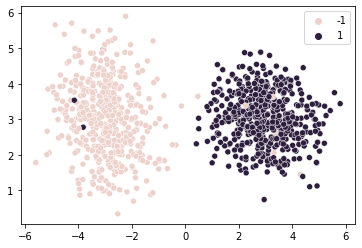

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,  n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           random_state=56, class_sep=3)
y[y==0] = -1
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [ ]:
## Defining the functions to compute the derivative of log loss(L) w.r.t 'w' and 'b'
def dL_by_dw(x_i, y_i, w, b):
  return -(x_i * y_i * np.exp(-y_i * np.dot(w,x_i) + b))/( 1 + np.exp(-y_i * np.dot(w,x_i) + b))

def dL_by_db(x_i, y_i, w, b):
  return np.exp(-y_i * np.dot(w,x_i) + b) / ( 1 + np.exp(-y_i * np.dot(w,x_i) + b))


In [ ]:
## Helper functions ##
def sigmod(x):
  return 1/(1+ np.exp(-x) )

def predict(x_i, w, b):
  if sigmod(np.dot(w,x_i) + b) > 0.5:
    return 1
  else:
    return -1

def accuracy(y_true, y_pred):
  acc_count = 0
  N = len(y_true)
  
  for i in range(N):
    if y_pred[i] == y_true[i]:
      acc_count+=1
  return acc_count/N
 
def compute_log_loss(y_true, y_pred):
    loss = 0
    N = len(y_true)
    for i in range(N):
      if y_true[i] == 1:
        loss += -log10(y_pred[i])
      else:
        loss += -log10(1-y_pred[i])

    return loss/N

In [ ]:
######################################## gradient descent implementation ########################################
n_epoch = 100
learning_rate = 0.0001

## initialzing weights and bias
w = np.zeros(X.shape[1])
b = 0

loss_list = []; w_list = []; b_list = []

for epoch in range(n_epoch):
  fin_dw = 0
  fin_db = 0
  for i in range(len(X)):
    x_i = X[i]
    y_i = y[i]

    fin_dw += dL_by_dw(x_i, y_i, w, b)
    fin_db += dL_by_db(x_i, y_i, w, b)

  w = w - learning_rate * fin_dw
  b = b - learning_rate * fin_db
  
  ## Computing the loss @ the end of each epoch
  y_pred = []
  for i in range(len(X)):
    y_hat = sigmod(np.dot(w,X[i]) + b) 
    y_pred.append(y_hat)

  loss_list.append( compute_log_loss(y, y_pred) )
  w_list.append(w)
  b_list.append(b)

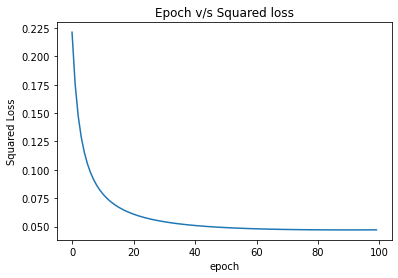

 Minimum loss is @ epoch 90
 Best weight: [ 1.16632367 -0.01648597] and bias: -0.7096089108472678


In [ ]:
## Plot to compare the loss on every epoch
plt.title("Epoch v/s Squared loss")
sns.lineplot(x=[e for e in range(n_epoch)], y=loss_list)
plt.xlabel("epoch")
plt.ylabel("Squared Loss")
plt.show()

min_loss_epoch = np.argmin(loss_list)
best_weight = w_list[min_loss_epoch]
best_bias = b_list[min_loss_epoch]

print(f" Minimum loss is @ epoch {min_loss_epoch}")
print(f" Best weight: {best_weight} and bias: {best_bias}")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    return points[:,0], points[:,1]

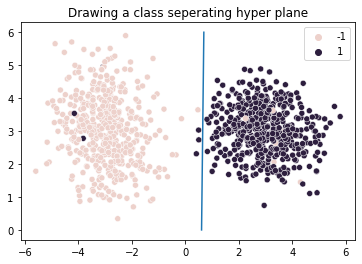

In [ ]:
line_x, line_y = draw_line(best_weight,best_bias, 0,6)
plt.title("Drawing a class seperating hyper plane")
sns.lineplot(x=line_x, y=line_y)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [ ]:
## Calculating accuracy
y_pred = []
for i in range(len(X)):
  y_hat = predict(X[i], best_weight,best_bias)
  y_pred.append(y_hat)

print(f" Accuracy on the dataset: {accuracy(y, y_pred)}")

 Accuracy on the dataset: 0.986


In [ ]:
miss_classified_points = []
print("============ Misclassified points===========")
print("data point                | y_true | y_pred")
print("-------------------------------------------")
for i in range(len(X)):
  if y[i] != y_pred[i]:
    print(f"{X[i]} | {y[i]}     | {y_pred[i]}")
    miss_classified_points.append(X[i])

miss_classified_points = np.array(miss_classified_points)

============ Misclassified points===========
data point                | y_true | y_pred
-------------------------------------------
[-3.07154945  4.95480404] | 1     | -1
[3.52655079 3.80064552] | -1     | 1
[4.30552677 1.45125073] | -1     | 1
[2.92248304 2.51649486] | -1     | 1
[0.50364137 2.73359695] | 1     | -1
[-3.81576491  2.77812352] | 1     | -1
[3.31644498 2.06056408] | -1     | 1
[0.49763627 3.03079712] | 1     | -1
[3.63049053 2.98899914] | -1     | 1
[3.3759898  2.63393316] | -1     | 1
[3.27487951 3.62675275] | -1     | 1
[2.25379174 3.38158532] | -1     | 1
[-4.14863128  3.53707399] | 1     | -1
[0.41350085 2.3105794 ] | 1     | -1


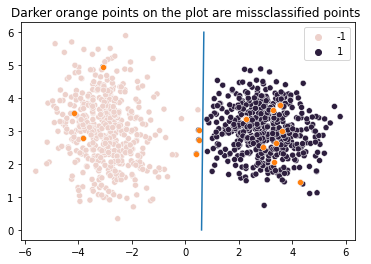

In [ ]:
## dark orange points on the plot are missclassified points
line_x, line_y = draw_line(best_weight,best_bias, 0,6)
plt.title("Darker orange points on the plot are missclassified points ")
sns.lineplot(x=line_x, y=line_y)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
sns.scatterplot(x=miss_classified_points[:,0], y=miss_classified_points[:,1])
plt.show()